In [1]:
from tpot import TPOTClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv(r'C:\Users\mweather\Desktop\Classes\Term 3\Machine Learning I\mini_lab_2\Imputed_Dataset.csv')

In [3]:
#remove not used columns and nans
#Create a price class attribute 
df.loc[(df['price_class'] == 'Low'),'price_class_final'] = 0
df.loc[(df['price_class'] == 'Average'),'price_class_final'] = 1
df.loc[(df['price_class'] == 'High'),'price_class_final'] = 2

#remove not used columns and nans
df = df.drop(columns=['Unnamed: 0','lat', 'lon','id','start_date','end_date','created_on','property_type','l1','l2','l3','title','description','price_class'])
df = df.dropna()

df.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,log_price,price_class_final
0,4.0,3.0,2.0,198.0,150.0,385000.0,12.860999,2.0
1,4.0,3.0,2.0,198.0,150.0,385000.0,12.860999,2.0
2,7.0,3.0,2.0,173.0,173.0,195000.0,12.180755,1.0
3,3.0,3.0,1.0,49.0,40.0,85000.0,11.350407,0.0
4,3.0,3.0,1.0,49.0,40.0,85000.0,11.350407,0.0


In [4]:
len(df)

463723

In [5]:
# NOTE: Make sure that the outcome column is labeled 'target' in the data file
features = df.drop('price_class_final', axis=1)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(features.astype(np.float64),
    df.price_class_final.astype(np.float64), train_size=0.75, test_size=0.25, random_state=42)

In [7]:
tpot = TPOTClassifier(generations=2, population_size=20, verbosity=3, random_state=42)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('tpot_pipeline.py')

31 operators have been imported by TPOT.


Skipped pipeline #1 due to time out. Continuing to the next pipeline.
Skipped pipeline #4 due to time out. Continuing to the next pipeline.
Skipped pipeline #9 due to time out. Continuing to the next pipeline.
Skipped pipeline #14 due to time out. Continuing to the next pipeline.
Skipped pipeline #17 due to time out. Continuing to the next pipeline.
Skipped pipeline #19 due to time out. Continuing to the next pipeline.
Skipped pipeline #22 due to time out. Continuing to the next pipeline.
Skipped pipeline #25 due to time out. Continuing to the next pipeline.
_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False.
_pre_test decorator: _random_mutation_operator: num_test=1 Unsupported set of arguments: The combination of penalty='l2' and loss='hinge' are not supported when dual=False, Parameters: penalty='l2', loss='hinge', dual=False.
_p

In [8]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification
clf = ExtraTreesClassifier(bootstrap=False, criterion="entropy", max_features=0.7000000000000001, min_samples_leaf=5, min_samples_split=18, n_estimators=100)
clf.fit(X_train, y_train)
#ExtraTreesClassifier(random_state=0)
y_pred = clf.predict(X_test)

In [10]:
from sklearn.metrics import confusion_matrix
#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[35355  2286    35]
 [ 1418 34291  2855]
 [   98  1947 37646]]


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

C:\Users\mweather\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


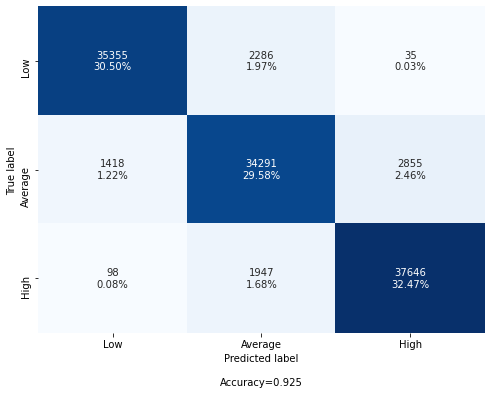

In [14]:
categories = ['Low', 'Average', 'High']
make_confusion_matrix(cf_matrix, figsize=(8,6), cbar=False, sum_stats=True, categories=categories )